In [29]:
# Import Library
import fredapi as fa 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def fetch_fred_data(series_id, start_date, end_date, column_name):
    fred = fa.Fred(api_key='1c6c04d387ef34dca89c616d907bdb79')  
    
    # Fetch data from FRED
    data = fred.get_series(series_id, start_date, end_date)
    
    # Convert data to a DataFrame
    df = pd.DataFrame({column_name: data})
    
    return df

# Define the time period
period_start = datetime(2017, 1, 1)
period_end = datetime(2024, 1, 1)

# Fetch data for different series
house_df = fetch_fred_data('CSUSHPISA', period_start, period_end, 'House Price')
interest_df = fetch_fred_data('DFF', period_start, period_end, 'Interest Rate')
default_df = fetch_fred_data('DRSFRMACBS', period_start, period_end, 'Default Rate')
credit_df = fetch_fred_data('RCCCBSCOREPCT50', period_start, period_end, 'Credit Score')
gdp_df = fetch_fred_data('A939RX0Q048SBEA', period_start, period_end, 'GDP')
bond_default_df = fetch_fred_data('DRBLACBS', period_start, period_end, 'Bond Default Rate')



Analyse 1: Interest rate and housing prices

In [30]:
# Slice the interest rate dataframe
interest_df = interest_df.loc['2017-01-01':'2023-10-01', :]
interest_df_m = interest_df.resample('MS').mean()

# Merge the two dataframes
merge_df_1 = pd.merge(interest_df_m, house_df, left_index=True, right_index=True)

Analysis 2: Interest rate and delinquency rate

In [31]:
interest_df_q = interest_df.resample('QS').mean()
interest_df_q = interest_df_q.loc['2017-01-01':'2023-07-01', :]
merge_df_2 = pd.merge(interest_df_q, default_df, left_index=True, right_index=True)

Analysis 3: Broad economic outlook - Q and creditworthiness - Q

In [32]:
# Merge the two data series
gdp_df = gdp_df.loc['2017-01-01':'2023-04-01', :]
merge_df_3 = pd.merge(gdp_df, credit_df, left_index=True, right_index=True)

Analysis 4: Creditworthiness and default rate

In [33]:
# Merge the two data series
default_df = default_df.loc['2017-01-01':'2023-04-01', :]
merge_df_4 = pd.merge(default_df, credit_df, left_index=True, right_index=True)

Analysis 5: Creditworthiness and bond default rate

In [34]:
# Merge the two data series
bond_default_df = bond_default_df.loc['2017-01-01':'2023-04-01', :]
merge_df_5 = pd.merge(bond_default_df, credit_df, left_index=True, right_index=True)

In [35]:
# Merge all the data from assignment 1
merge = pd.merge(merge_df_1.resample('QS').mean().loc['2017-01-01':'2023-04-01', :]['House Price'], merge_df_2.loc['2017-01-01':'2023-04-01', :], left_index=True, right_index=True)
merge = pd.merge(merge, merge_df_3, left_index=True, right_index=True)
merge

,House Price,Interest Rate,Default Rate,GDP,Credit Score
2017-01-01,187.368333,0.698889,3.90,59494.0,756.0
2017-04-01,189.615000,0.947363,3.68,59736.0,757.0
2017-07-01,192.620333,1.153696,3.64,60099.0,757.0
2017-10-01,195.969667,1.204674,3.57,60674.0,757.0
2018-01-01,199.165333,1.447000,3.48,61093.0,757.0
2018-04-01,201.440000,1.736923,3.22,61336.0,758.0
2018-07-01,203.644667,1.926196,2.99,61622.0,758.0
2018-10-01,205.632333,2.220109,2.83,61619.0,758.0
2019-01-01,206.818000,2.401778,2.70,61889.0,759.0
2019-04-01,208.107333,2.397363,2.60,62331.0,760.0


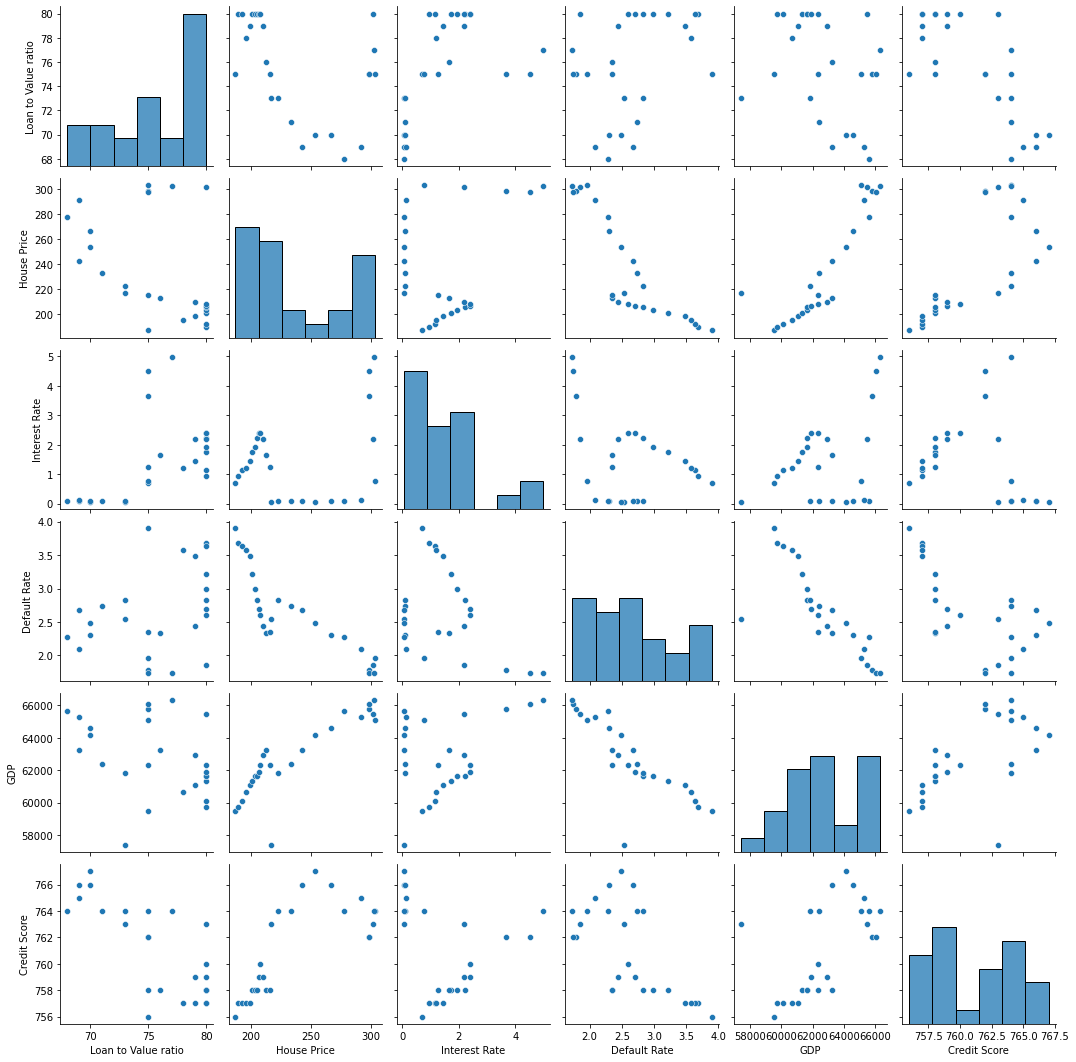

In [36]:
# Import Leverage data
series_id = 'RCMFLOLTVPCT50'
period_start = '2017-01-01'
period_end = '2023-04-01'

ltv_mortgage = fred.get_series(series_id, period_start, period_end)
ltv_mortgage = ltv_mortgage.to_frame('Loan to Value ratio')

# Merge the new variable:LTV to the original dataframe
merge = pd.merge(ltv_mortgage, merge, left_index=True, right_index=True)

# Use th seaborn libraries to draw the scatter plots between the varables among the columns
sns.pairplot(merge)

Discussion: Different from Assignment 1, this graph includes the loan-to-value ratio in the pair plot. As can be observed from the graph, house prices and the loan-to-value ratio are roughly negatively correlated. The other variables, including interest rate, default rate, GDP, and credit scores, exhibit patterns that are not very explicit. However, it is speculated that there is a possible positive correlation between the loan-to-value ratio and interest rate and default rate. The remaining two variables are estimated to have a slight negative correlation.

Regarding the relationship between house price and leverage level, it could be interpreted that when house prices are high or GDP is high, the loan-to-value ratio tends to decline. This might be due to regulations imposed when housing prices are high, allowing banks to manage credit risks more effectively. Alternatively, it could be interpreted that when inflation is high, house buyers tend to be more leveraged due to the higher prices of the properties and economic downturns.

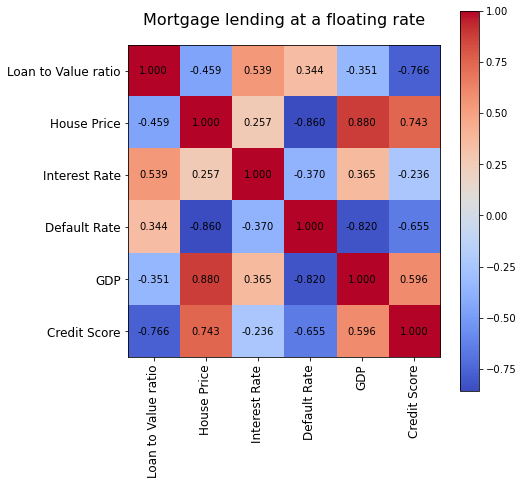

In [37]:
# Import libraries
import matplotlib.pyplot as plt

# Calculate the correlation
corr = merge.corr()

# Create a heatmap and choose a colormap
plt.imshow(corr, cmap='coolwarm')

# Add a colorbar
plt.colorbar()

# Change the graph size
plt.gcf().set_size_inches(7, 7)

# add x-ticks, y-ticks and a label
ticks = ['Loan to Value ratio', 'House Price', 'Interest Rate', 'Default Rate',
       'GDP', 'Credit Score']
plt.xticks(range(len(corr.columns)), ticks, fontsize=12, rotation=90)
plt.yticks(range(len(corr.columns)), ticks, fontsize=12)
plt.title('Mortgage lending at a floating rate', fontsize=16, pad=20)

# Add labels to the cells
labels = corr.values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.3f}'.format(labels[b, a]), ha='center', va='center', color='black')

Discussion: A correlation heatmap has been created to conduct a more accurate analysis between different variables. Surprisingly, the absolute value of the correlation between the Loan-to-Value (LTV) ratio and other variables is higher than in most visually aligned plots. The LTV ratio and the credit scores of house buyers are highly negatively correlated. Additionally, the LTV ratio and interest rate exhibit a significant negative correlation (53.9%).

When interest rates are high, people tend to be more leveraged. This might be due to the fact that when rates are high, the economy is normally in a downturn. People tend to be tighter on cash, leading to higher leverage when purchasing a home. However, this results in lower credit scores of borrowers (-0.76). Therefore, banks and lending companies need to be more careful in assessing the credit risk of mortgage borrowers when interest rates or house prices are high.

In [38]:
# adjust the dataframe
bond_volume = pd.read_csv('Resources/IUSB (1).csv')
bond_volume = bond_volume.set_index('Date')['Volume']
bond_df = bond_volume.to_frame('Volume')
bond_df.index = pd.to_datetime(bond_df.index)
bond_df = bond_df.resample('QS').mean()

In [39]:
# merge the dataframes
bond_volume = pd.merge(bond_df, interest_df_q, left_index=True, right_index=True)
bond_volume = pd.merge(merge_df_5, bond_volume, left_index=True, right_index=True)

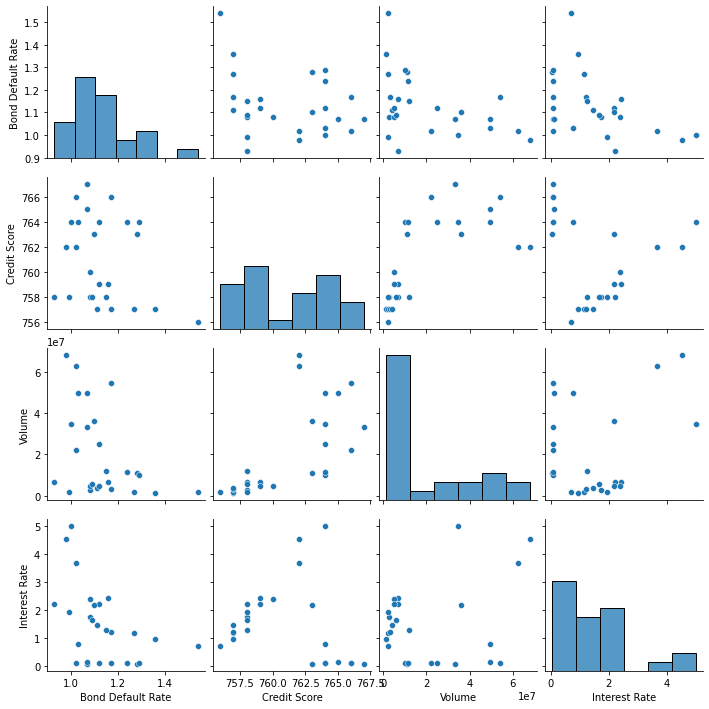

In [40]:
# Show the g
sns.pairplot(bond_volume)

Discussion: From the third line, it can be roughly estimated that the US bond index volume (liquidity) is positively correlated with credit score and interest rate. The liquidity is negatively correlated with bond default rate.

This could be interpreted as when the bond borrowers' credit scores are high (the borrowers are in good financial health), the bond market tends to be more liquid, and more bonds are traded on the market. The bond market is more efficient and healthy. When the interest rates are high, more new bonds with higher rates will be issued, and the liquidity is thus higher. The bond borrowers tend to have a higher default rate when the market is less liquid, which is plausible since when the bond market is more illiquid, the trading costs are higher, and there are also liquidity risks associated with the bond.

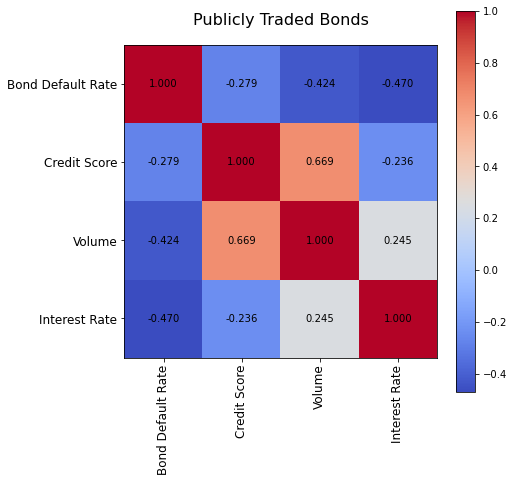

In [41]:
# Calculate the correlation
corr = bond_volume.corr()

# Create a heatmap and choose a colormap
plt.imshow(corr, cmap='coolwarm')

# Add a colorbar
plt.colorbar()

# Change the graph size
plt.gcf().set_size_inches(7, 7)

# add x-ticks, y-ticks and a label
ticks = ['Bond Default Rate', 'Credit Score', 'Volume', 'Interest Rate']
plt.xticks(range(len(corr.columns)), ticks, fontsize=12, rotation=90)
plt.yticks(range(len(corr.columns)), ticks, fontsize=12)
plt.title('Publicly Traded Bonds', fontsize=16, pad=20)

# Add labels to the cells
labels = corr.values
for a in range(labels.shape[0]):
    for b in range(labels.shape[1]):
        plt.text(a, b, '{:.3f}'.format(labels[b, a]), ha='center', va='center', color='black')

Discussion: This graph is an aggregate representation allowing us to closely assess the correlation levels between bond liquidity and the other three variables.

The correlation between bond liquidity and credit scores is relatively high (0.669), while the correlation between bond liquidity and bond default rate is roughly low (-0.424).